# Finding the autoregulation curve

Simo Mäkelä  
Helsinki Metropolia University of Applied Sciences  
24.8.2020

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import zoll
import nirs

In [2]:
filename = 'AR18F032727-20200113-114412-690'
json = zoll.LoadJSON("data/" + filename + ".json")

In [3]:
bp_df, samplerate = zoll.LoadWaveform(json, hide_starttime=True)

Duration:      3164.28 s

Total samples:     395535      Discarded:    3383
Sample rate:          125 1/s  Sample time:  8000 μs


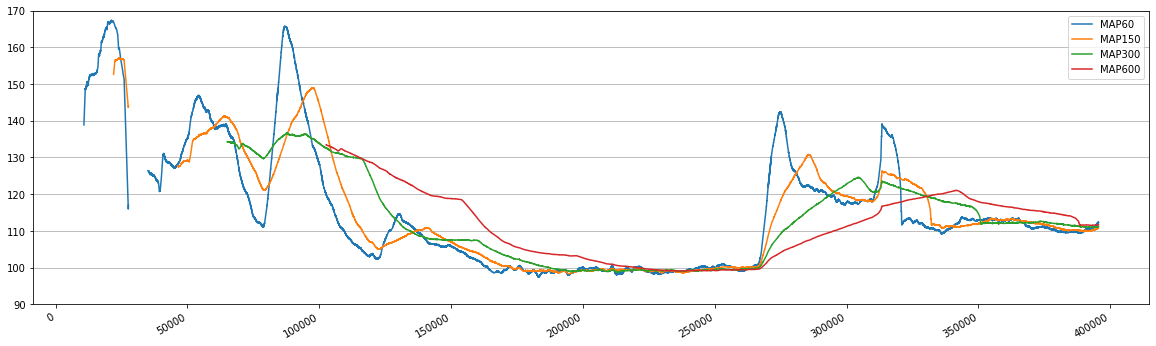

In [4]:
def ComputeMAP(waveform, window, samplerate, win_type=None):
    win = window * samplerate
    return waveform.rolling(win, win_type=win_type).mean()

bp_df['MAP60'] = ComputeMAP(bp_df['Waveform'], 60, samplerate)
bp_df['MAP150'] = ComputeMAP(bp_df['Waveform'], 150, samplerate)
bp_df['MAP300'] = ComputeMAP(bp_df['Waveform'], 300, samplerate)
bp_df['MAP600'] = ComputeMAP(bp_df['Waveform'], 600, samplerate)

bp_df[['MAP60', 'MAP150', 'MAP300', 'MAP600']].plot(figsize=(20,6), ylim=(90, 170), use_index=False).grid(axis='y')

In [5]:
# merge with NIRS (rSO2) data
nirs_df = nirs.LoadCSV("data/" + filename + ".csv")
df = pd.merge_asof(nirs_df['rSO2 (%)'], bp_df[['MAP60', 'MAP150', 'MAP300', 'MAP600']], on='Time', direction='nearest')
df.set_index('Time', inplace=True)

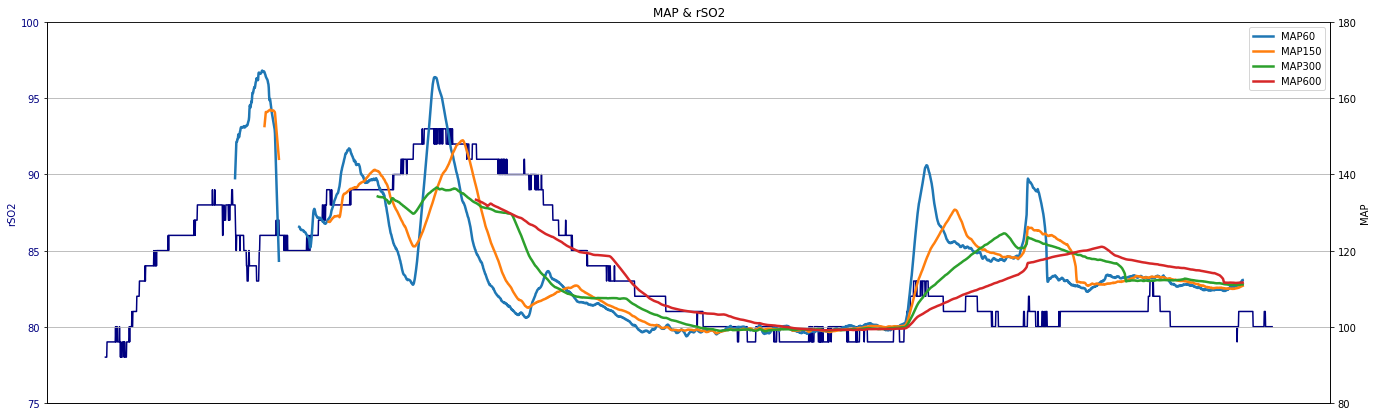

In [17]:
fig, ax1 = plt.subplots(figsize=(23,7))
ax1.set_ylabel('rSO2', color='navy')
ax1.set_ylim(75, 100)
ax1.plot(df.index, df['rSO2 (%)'], color='navy', label='rSO2')
ax1.tick_params(axis='y', labelcolor='navy')
ax1.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
ax2 = ax1.twinx()
ax2.set_ylabel('MAP')
ax2.set_ylim(80, 180)
lineObjects = ax2.plot(df.index, df[['MAP60', 'MAP150', 'MAP300', 'MAP600']], linewidth=2.5)
plt.legend(lineObjects, ('MAP60', 'MAP150', 'MAP300', 'MAP600'), loc="upper right")
ax2.tick_params(axis='y')
ax2.grid()
plt.title("MAP & rSO2")
plt.show()

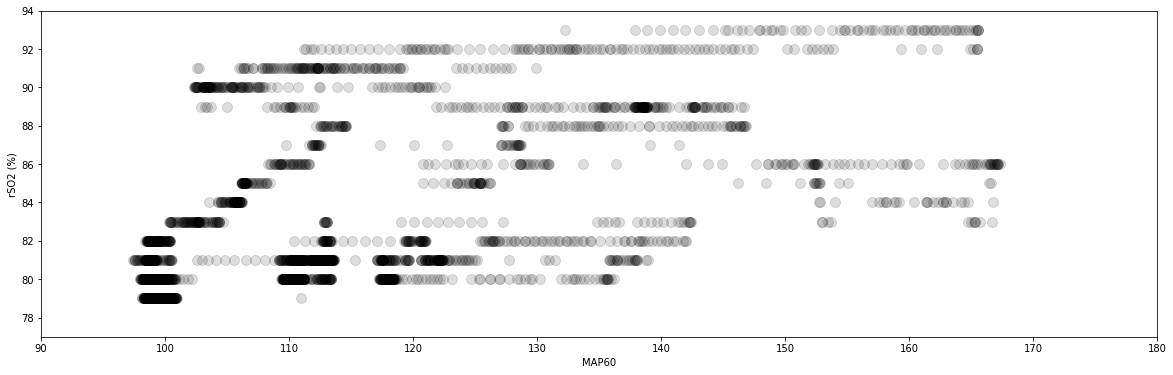

In [7]:
df.plot.scatter(x = 'MAP60', y = 'rSO2 (%)', xlim=(90,180), ylim=(77,94), figsize=(20, 6), marker='o', s=100, color='k', alpha=0.13)

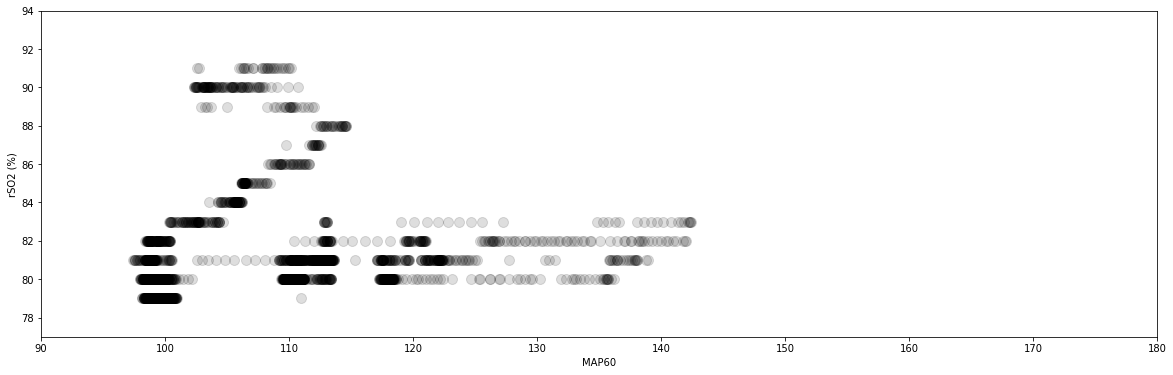

In [16]:
df.tail(len(df.index)-1200).plot.scatter(x = 'MAP60', y = 'rSO2 (%)', xlim=(90,180), ylim=(77,94), figsize=(20, 6), marker='o', s=100, color='k', alpha=0.13)

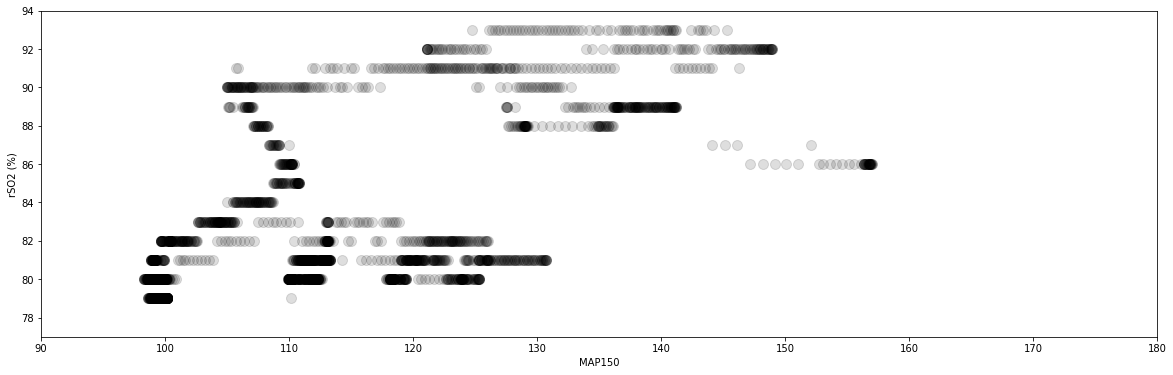

In [8]:
df.plot.scatter(x = 'MAP150', y = 'rSO2 (%)', xlim=(90,180), ylim=(77,94), figsize=(20, 6), marker='o', s=100, color='k', alpha=0.13)

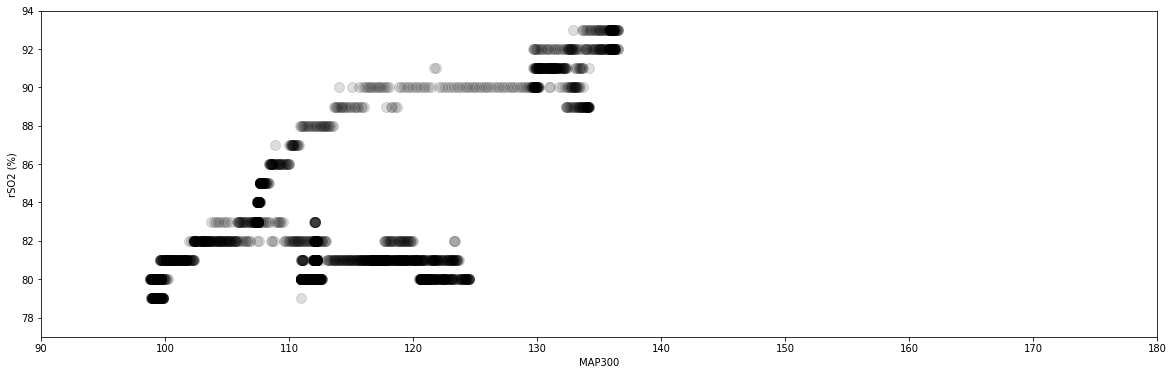

In [9]:
df.plot.scatter(x = 'MAP300', y = 'rSO2 (%)', xlim=(90,180), ylim=(77,94), figsize=(20, 6), marker='o', s=100, color='k', alpha=0.13)

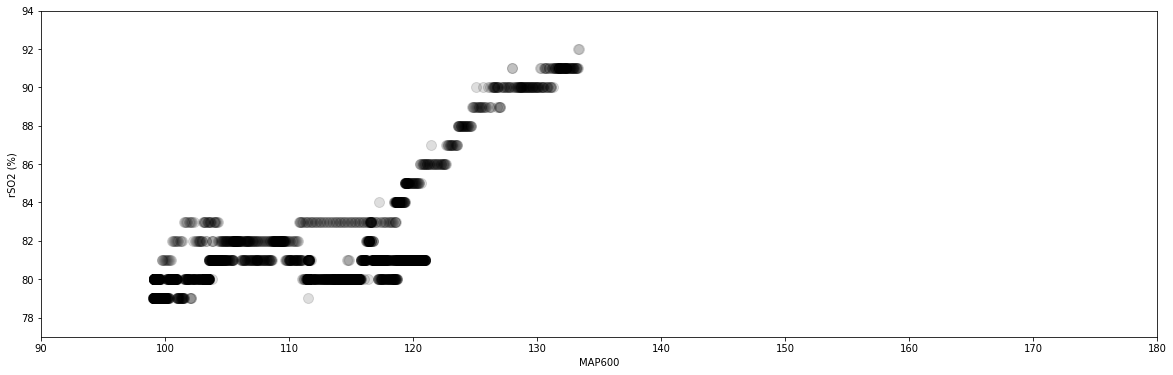

In [10]:
df.plot.scatter(x = 'MAP600', y = 'rSO2 (%)', xlim=(90,180), ylim=(77,94), figsize=(20, 6), marker='o', s=100, color='k', alpha=0.13)